# Abalone number of rings prediction

## 1- Importing libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import sem, t
import math
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import time
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV


import warnings
warnings.filterwarnings('ignore')

## 2- Importing dataset
The dataset used is taken from the UCI Machine Learning Repository:
[Dataset Link](https://archive.ics.uci.edu/ml/datasets/abalone) <br />


In [2]:
##Loading the data, same data as Project1 
df = pd.read_csv('abalone.data', header=None)
#adding the features (variables) names
var_names = ['Sex','Length (mm)', 'Diameter (mm)', 'Height (mm)', 'Whole weight (grs)', \
             'Shucked weight (grs)', 'Viscera weight (grs)', 'Shell weight (grs)', 'Rings']

df.columns= var_names

In [3]:
df.head()

,Sex,Length (mm),Diameter (mm),Height (mm),Whole weight (grs),Shucked weight (grs),Viscera weight (grs),Shell weight (grs),Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## 2- Exploratory data analysis (EDA)

Checking the data types of the dataset and checking if there are null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sex                   4177 non-null   object 
 1   Length (mm)           4177 non-null   float64
 2   Diameter (mm)         4177 non-null   float64
 3   Height (mm)           4177 non-null   float64
 4   Whole weight (grs)    4177 non-null   float64
 5   Shucked weight (grs)  4177 non-null   float64
 6   Viscera weight (grs)  4177 non-null   float64
 7   Shell weight (grs)    4177 non-null   float64
 8   Rings                 4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Possible to see that the lenght of the dataset is **4177** rows, there are not null valuees and the datatypes present are:

In [5]:
#how many times each data type is present in the dataset
pd.value_counts(df.dtypes)

float64    7
int64      1
object     1
dtype: int64

In [6]:
#stats for non numerical data
df.describe(exclude="number")
print('')
#stats for numerical data
df.describe()

,Length (mm),Diameter (mm),Height (mm),Whole weight (grs),Shucked weight (grs),Viscera weight (grs),Shell weight (grs),Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Possible to see that there is one variable, **Sex**, that is nominal with 3 different categories. <br>
Also we can see the descriptive statistics for the continuos variable

In [7]:
#checking the sex types
sex_variables = np.unique(df['Sex'])
sex_variables

array(['F', 'I', 'M'], dtype=object)

In [8]:
#checking if there is duplicated data
duplicates = df.duplicated().sum()
print(f'There are {duplicates} duplicates in the dataframe')

There are 0 duplicates in the dataframe


### Distributions and outliers

A distplot and a boxplot are going to be displayed for the continuous variables, for checking the distribution and the outliers

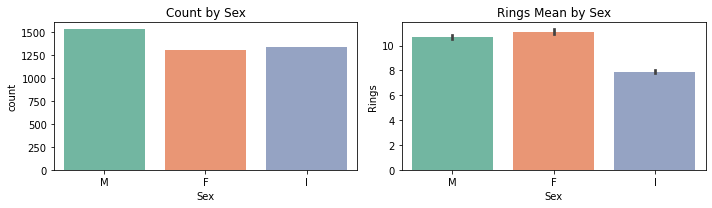

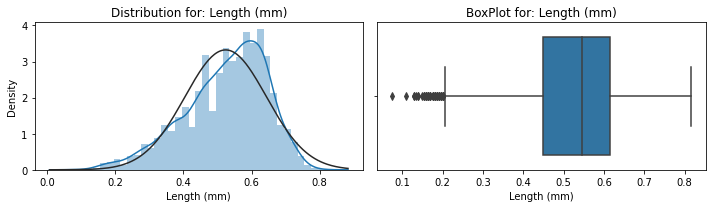

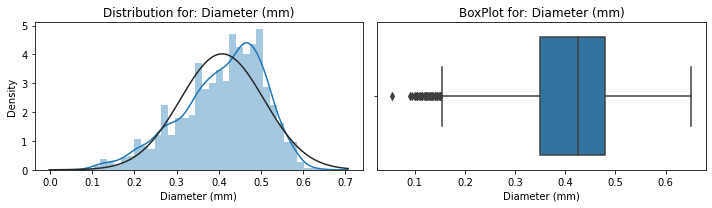

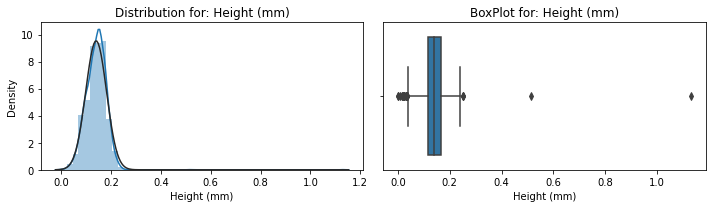

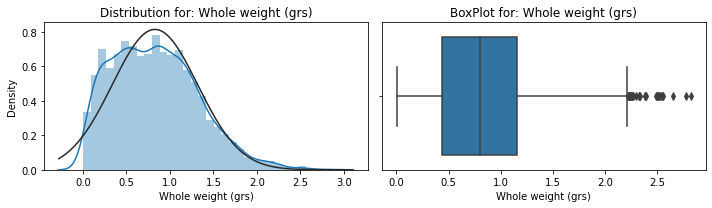

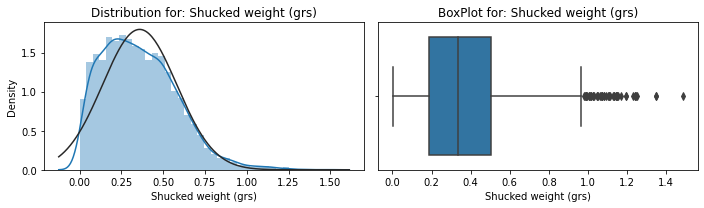

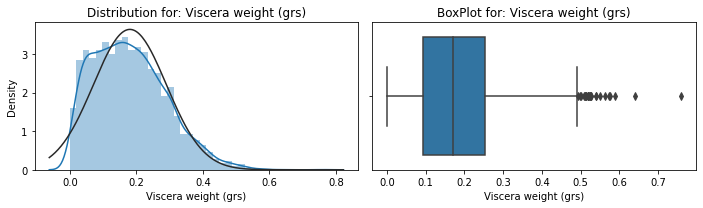

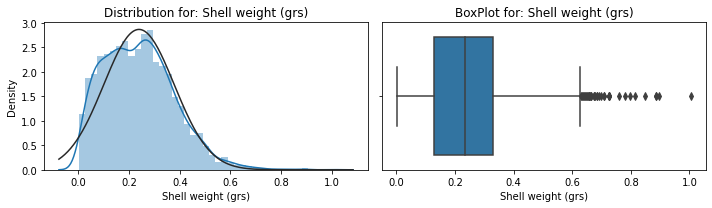

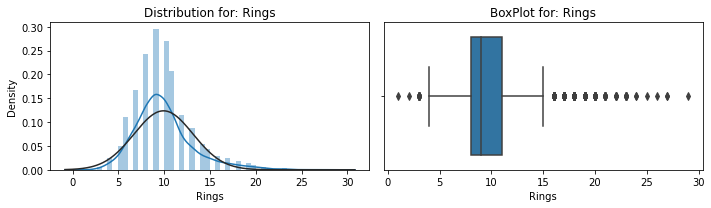

In [9]:
for col in df:
    fig, ax = plt.subplots(1,2, figsize=(10, 3))
    if col != 'Sex':
        #fig, ax = plt.subplots(1,2, figsize=(10, 3))
        sns.distplot(df[col], kde=True, fit= stats.norm, ax=ax[0]).set(title= f'Distribution for: {col}')
        sns.boxplot(x=col, data=df, ax=ax[1]).set(title= f"BoxPlot for: {col}",ylabel='')
    else:
        #fig, ax = plt.subplots(1,2, figsize=(10, 3))
        sns.countplot(df['Sex'], palette="Set2", ax=ax[0]).set(title= f'Count by Sex')
        sns.barplot(x = 'Sex', y = 'Rings', palette='Set2', data = df, estimator=np.mean, ax=ax[1]).set(title= f'Rings Mean by Sex')
    
    plt.tight_layout()
    plt.show()
    

Possible to observe that there are some distributions that are skewed and there are also outliers.

In [10]:
# skewness along the index axis
df.skew(axis = 0)
#If skewness is less than −1 or greater than +1, the distribution can be called highly skewed.
#If skewness is between −1 and -0.5 or between +0.5 and +1, the distribution can be called moderately skewed.
#If skewness is between -0.5 and +0.5, the distribution can be called approximately symmetric.

Length (mm)            -0.639873
Diameter (mm)          -0.609198
Height (mm)             3.128817
Whole weight (grs)      0.530959
Shucked weight (grs)    0.719098
Viscera weight (grs)    0.591852
Shell weight (grs)      0.620927
Rings                   1.114102
dtype: float64

In [11]:
def get_IQR(df, col):
    q25 = np.percentile(df[col], 25, interpolation = 'midpoint')
    q50 = np.percentile(df[col], 50, interpolation = 'midpoint')
    q75 = np.percentile(df[col], 75, interpolation = 'midpoint')
    IQR = q75 - q25 #Interquartile range
    low_bound = q25 - 1.5*IQR
    up_bound = q75 + 1.5*IQR
    return (low_bound,up_bound)

def get_outliers(df):
    print(f'Counting the outliers for each column')
    print('-------------------------------------')
    len_df = len(df)
    for col in df:
        if df[col].dtype != 'O':
            print(col)
            low_bound, up_bound = get_IQR(df, col)
            outliers = np.array([row for row in df[col] if (row < low_bound or row > up_bound)])
            outliers = np.sort(outliers)
            print(f'Number of outliers for the col {col}: {len(outliers)} , {round((len(outliers)/len_df)*100,2)}% of the data \n')

In [12]:
#number of outliers per variable
get_outliers(df)

Counting the outliers for each column
-------------------------------------
Length (mm)
Number of outliers for the col Length (mm): 49 , 1.17% of the data 

Diameter (mm)
Number of outliers for the col Diameter (mm): 59 , 1.41% of the data 

Height (mm)
Number of outliers for the col Height (mm): 29 , 0.69% of the data 

Whole weight (grs)
Number of outliers for the col Whole weight (grs): 30 , 0.72% of the data 

Shucked weight (grs)
Number of outliers for the col Shucked weight (grs): 48 , 1.15% of the data 

Viscera weight (grs)
Number of outliers for the col Viscera weight (grs): 26 , 0.62% of the data 

Shell weight (grs)
Number of outliers for the col Shell weight (grs): 35 , 0.84% of the data 

Rings
Number of outliers for the col Rings: 278 , 6.66% of the data 



### Features relationships

First, the relationships between the variables are going to be plotted separated by Sex 

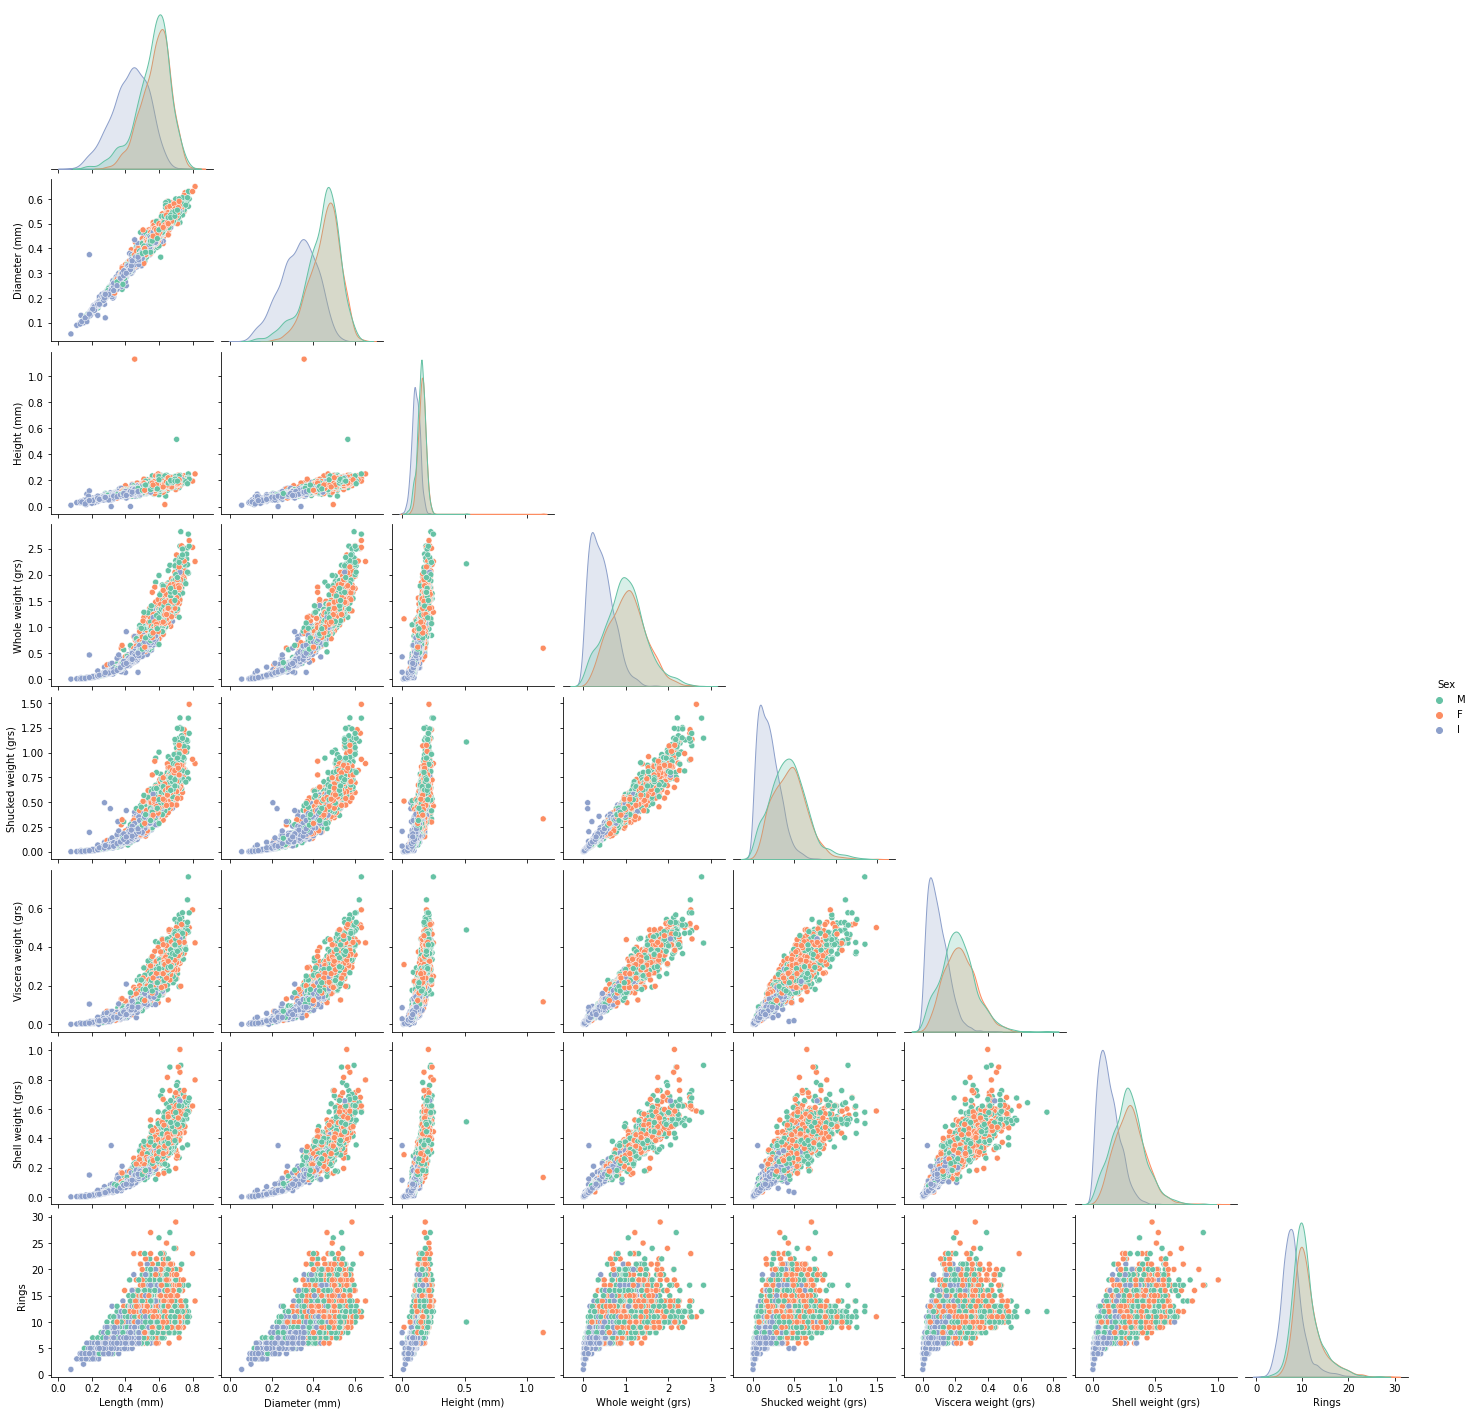

In [13]:
sns.pairplot(df,hue='Sex', palette='Set2', corner=True)  
plt.show()

Possible to observe that there are variables with a strong correlation. Also, that the distributions for infants are different from the adults (Male and Female) but still there is a large overlap between the categories. Additionally, the distributions from Male and Female are similar.

In the following plots we are going to observe the distributions of the continuous variables based on the sex

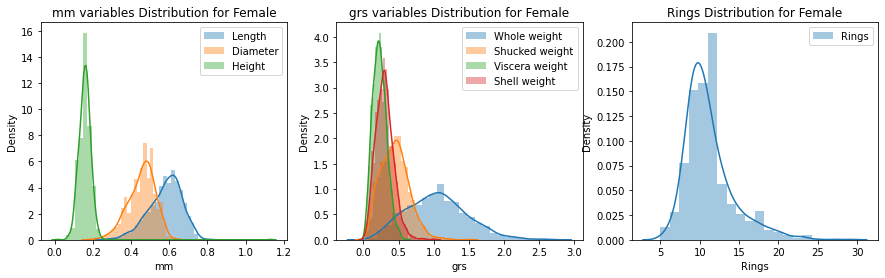

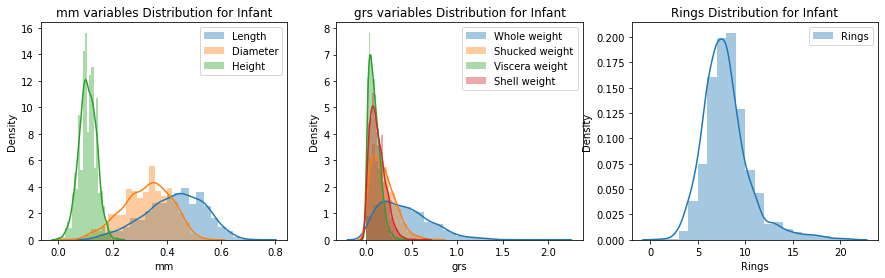

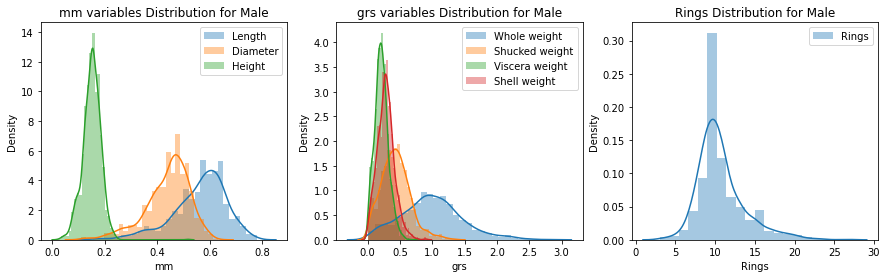

In [14]:
mm_variables = ['Length (mm)', 'Diameter (mm)', 'Height (mm)']
grs_variables = ['Whole weight (grs)', 'Shucked weight (grs)', 'Viscera weight (grs)','Shell weight (grs)']
dict_sex = {'I': 'Infant', 'F': 'Female', 'M': 'Male'}

for sex in sex_variables:
    df_sex = df.loc[df['Sex'] == sex]
    fig, ax = plt.subplots(1,3, figsize=(15, 4))
    #mm
    for i in mm_variables:
        fig = sns.distplot(df_sex[i], label=f"{i.split(' (')[0]}", axlabel= 'mm',ax=ax[0])
    ax[0].set_title(f'mm variables Distribution for {dict_sex[sex]}')
    ax[0].legend()
    #grs
    for j in grs_variables:
        sns.distplot(df_sex[j], label=f"{j.split(' (')[0]}", axlabel= 'grs',ax=ax[1])
    ax[1].set_title(f'grs variables Distribution for {dict_sex[sex]}')
    ax[1].legend()
    #rings
    sns.distplot(df_sex['Rings'], bins=20, label="Rings",ax=ax[2])
    ax[2].set_title(f'Rings Distribution for {dict_sex[sex]}')
    ax[2].legend()
    

### Correlation Matrix

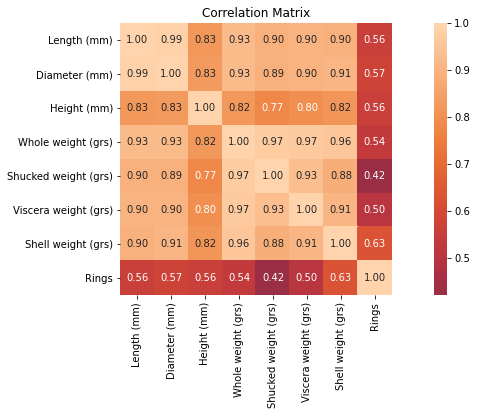

Correlation with Rings


Shell weight (grs)      0.627574
Diameter (mm)           0.574660
Height (mm)             0.557467
Length (mm)             0.556720
Whole weight (grs)      0.540390
Viscera weight (grs)    0.503819
Shucked weight (grs)    0.420884
Name: Rings, dtype: float64

In [15]:
fig, ax = plt.subplots(1,1, figsize=(15, 5))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,square=True,center=0, fmt='.2f', annot=True, ax=ax)
ax.title.set_text('Correlation Matrix')
plt.show()
print('Correlation with Rings')
abs(corr_matrix['Rings']).sort_values(ascending=False)[1:]

By observing the correlation matrix we can see that the variables have a high correlation between them. This is due the nature of the the data. By inspecting the dataset information it is possible to get the following information for each variable:<br>
- Length: Longest shell measurement
- Diameter: perpendicular to length
- Height: with meat in shell
- Whole weight: whole abalone
- Shucked weight: weight of meat
- Viscera weight: gut weight (after bleeding)
- Shell weight: after being dried
- Rings: +1.5 gives the age in years

Using this information some **Feature Engineering** is going to be performed

## 3 - Feature Engineering

Because we have the length and the diameter of the Abalone, first we are going to build a new variable, **Area_Ellipse**, that calculates the area of an ellipse using the lenght and the diameter of the Abalone: <br>
$AreaEllipse_{abalone}(length, diamenter)$ = $\frac{\Pi\cdot length\cdot diameter}{4}$

In [16]:
df_eng = df.copy()

In [17]:
df_eng['Area_Ellipse(mm2)'] = df_eng.apply(lambda row: round(math.pi*(row['Length (mm)']*row['Diameter (mm)'])/4 ,3), axis=1) 

In [18]:
#df_eng.drop(columns={'Length (mm)', 'Diameter (mm)','Shucked weight (grs)', 'Viscera weight (grs)'}, axis=1, inplace=True)
df_eng.drop(columns={'Length (mm)', 'Diameter (mm)'}, axis=1, inplace=True)

In [19]:
df_eng.columns
cols_reordered = ['Sex','Area_Ellipse(mm2)','Height (mm)', 'Whole weight (grs)', 'Shucked weight (grs)', \
                  'Viscera weight (grs)', 'Shell weight (grs)', 'Rings']
df_eng = df_eng.reindex(columns=cols_reordered)

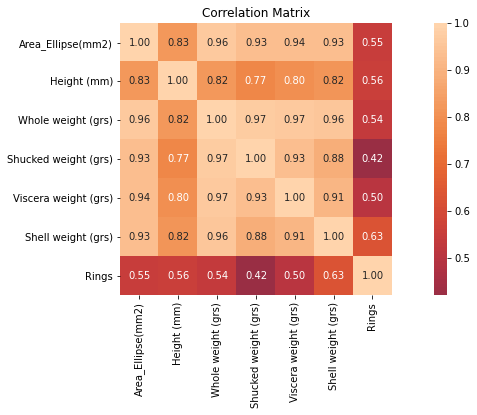

Correlation with Rings


Shell weight (grs)      0.627574
Height (mm)             0.557467
Area_Ellipse(mm2)       0.548957
Whole weight (grs)      0.540390
Viscera weight (grs)    0.503819
Shucked weight (grs)    0.420884
Name: Rings, dtype: float64

In [20]:
fig, ax = plt.subplots(1,1, figsize=(15, 5))
corr_matrix = df_eng.corr()
sns.heatmap(corr_matrix,square=True,center=0, fmt='.2f', annot=True, ax=ax)
ax.title.set_text('Correlation Matrix')
plt.show()
print('Correlation with Rings')
abs(corr_matrix['Rings']).sort_values(ascending=False)[1:]

### Encoding Sex
OneHotEncoding is going to be used.

In [21]:
encoder = OneHotEncoder()
sex_encoder = encoder.fit_transform(df[["Sex"]]).toarray()
encoder.categories_ #to check the order
F,I,M = [[row[sex_category] for row in sex_encoder] for sex_category in range(len(encoder.categories_[0]))]

df_eng.insert(0, "Sex_F", F, True) 
df_eng.insert(1, "Sex_I", I, True)
df_eng.insert(2, "Sex_M", M, True) 
#drop sex
df_eng.drop(columns={'Sex'}, axis=1, inplace=True)
df_eng.head()


,Sex_F,Sex_I,Sex_M,Area_Ellipse(mm2),Height (mm),Whole weight (grs),Shucked weight (grs),Viscera weight (grs),Shell weight (grs),Rings
0,0.0,0.0,1.0,0.130,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.0,0.0,1.0,0.073,0.090,0.2255,0.0995,0.0485,0.070,7
2,1.0,0.0,0.0,0.175,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.0,0.0,1.0,0.126,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.0,1.0,0.0,0.066,0.080,0.2050,0.0895,0.0395,0.055,7


### Scaling the data
Standardizing the features by removing the mean and scaling to unit variance.

In [22]:
X = df_eng.drop({'Rings'}, axis=1)
y = df_eng['Rings']

standardScale = StandardScaler()
X_scaled = standardScale.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled)
X_scaled.columns = X.columns

## 4- Model Selection
For selecting a model, first we are going to try different models using the standard parameters.
Cross validation is going to be done in order to meassure the **RMSE** of the different models. <br>
The models that we are going to check are: <br>
- Linear Regression
- Random Forest
- Gradient Boosting
- XGBoost

In [23]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state=111)

In [24]:
models = [LinearRegression(), RandomForestRegressor(), GradientBoostingRegressor(), XGBRegressor()]
models_name = ['LR', 'RF', 'GB', 'XGB']

df_scores = pd.DataFrame()
for model_name, model in zip(models_name, models):
    scores = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv=10)
    rmse_scores = np.sqrt(-scores)
    df_scores[model_name] = rmse_scores

In [25]:
confidence = 0.95
models_resume = []
for name, mean, std in zip(models_name,df_scores.mean(),df_scores.std()):
    dict_model = {}
    n = len(df_scores)
    h = std * t.ppf((1 + confidence) / 2, n - 1)
    interval =[round(mean+h,3),round(mean-h,3)]
    dict_model['Model'] = name
    dict_model['RMSE'] = round(mean,3)
    dict_model['Std'] = round(std,3)
    dict_model['Confidence Interval'] = interval
    models_resume.append(dict_model)

In [26]:
df_scores = pd.DataFrame(models_resume)
df_scores.set_index('Model').sort_values(by='RMSE')

,RMSE,Std,Confidence Interval
Model,,,
GB,2.174,0.151,"[2.515, 1.832]"
RF,2.198,0.131,"[2.495, 1.902]"
LR,2.206,0.154,"[2.553, 1.858]"
XGB,2.333,0.106,"[2.572, 2.094]"


Based on the above dataframe that contains the RMSE for all the models, we are going to select the **Gradient Boosting Regressor** as a base model. After that we are going to perform a grid search for tunning the hyperparameters.

### Base Case: Gradient Boosting Regressor

Metrics for Gradient Boosting with default values 

MSE for Training: 1.8860887587245703
MSE for Test: 2.1895515047999883


Text(0.5, 0, 'Predictions of Rings')

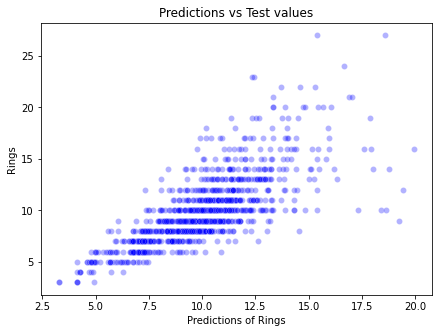

In [27]:
reg_base = GradientBoostingRegressor()
reg_base.fit(X_train,y_train)

#Training
print('Metrics for Gradient Boosting with default values \n')
y_pred_train = reg_base.predict(X_train)
print(f'MSE for Training: {np.sqrt(mean_squared_error(y_pred_train, y_train))}')
#Test
y_pred_test = reg_base.predict(X_test)
print(f'MSE for Test: {np.sqrt(mean_squared_error(y_pred_test, y_test))}')

#plot
fig, ax = plt.subplots(1,1, figsize=(7, 5))
sns.scatterplot(y_pred_test, y_test, alpha=0.3, color = 'blue')
ax.title.set_text('Predictions vs Test values')
plt.xlabel('Predictions of Rings')

### Hyperparameter tunning


In [199]:
start = time.process_time()
print('Searching..')
#evaluated hyperparameters
search_parameters = {'max_depth'     : [2, 3, 5, 10, 20, 100],\
                      'subsample'     : [0.5, 1],\
                      'learning_rate' : [0.001, 0.005, 0.01, 0.1],\
                      'min_samples_split': np.append(np.array([0.01,0.05]),np.linspace(0.1, 0.3, 3, endpoint=True)),
                      }
             
#grid search
grid = GridSearchCV(GradientBoostingRegressor(n_estimators        = 1000,\
                                                random_state        = 111,\
                                                n_iter_no_change    = 5), #for early stop
                    param_grid = search_parameters,
                    scoring    = 'neg_root_mean_squared_error',
                    cv = 5,
                    return_train_score = True)
#fit
grid.fit(X_train, y_train)

print(f'time taken for the search : {time.process_time() - start}')

Searching..


GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(n_estimators=1000,
                                                 n_iter_no_change=5,
                                                 random_state=111),
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.1],
                         'max_depth': [2, 3, 5, 10, 20, 100],
                         'min_samples_split': array([0.01, 0.05, 0.1 , 0.2 , 0.3 ]),
                         'subsample': [0.5, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

time taken for the search : 1811.15625


It is important to note that the grid search took around 30 minutes.
The results are the following:

In [205]:
results = pd.DataFrame(grid.cv_results_)
results.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_samples_split,param_subsample,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
162,0.928717,0.171918,0.008377,0.001493,0.01,20,0.05,0.5,"{'learning_rate': 0.01, 'max_depth': 20, 'min_...",-2.154875,...,-2.148737,0.063896,1,-1.795605,-1.915849,-1.944468,-1.903004,-1.826356,-1.877056,0.056440
172,0.887237,0.143125,0.008576,0.001009,0.01,100,0.05,0.5,"{'learning_rate': 0.01, 'max_depth': 100, 'min...",-2.159832,...,-2.150359,0.064236,2,-1.808998,-1.913834,-1.948753,-1.900998,-1.847818,-1.884080,0.049611
152,0.769133,0.062286,0.007393,0.000479,0.01,10,0.05,0.5,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",-2.170685,...,-2.157593,0.065190,3,-1.894959,-1.948206,-1.967373,-1.966790,-1.897644,-1.934994,0.032347
174,0.940385,0.125320,0.007379,0.000490,0.01,100,0.1,0.5,"{'learning_rate': 0.01, 'max_depth': 100, 'min...",-2.185700,...,-2.159612,0.064818,4,-1.934008,-1.945454,-2.015601,-2.021942,-1.973815,-1.978164,0.035656
102,1.582969,0.300807,0.013965,0.002271,0.005,20,0.05,0.5,"{'learning_rate': 0.005, 'max_depth': 20, 'min...",-2.167809,...,-2.160003,0.064210,5,-1.832243,-1.911635,-1.949240,-2.002082,-1.886596,-1.916359,0.057294


The parameters that gives the best results are the following:

In [212]:
print(f'The best model is: {grid.best_estimator_} \n')
print(f'Number of trees due to early stopping: {grid.best_estimator_.n_estimators_} \n')
print(f'The RMSE Score for the model in the training set using cross validation is: {round(-grid.best_score_,4)} \n') # {grid.scoring}
#print(f'the best  combination of parameters obtained using Grid Search for the model are:\n {grid.best_params_}')

The best model is: GradientBoostingRegressor(learning_rate=0.01, max_depth=20,
                          min_samples_split=0.05, n_estimators=1000,
                          n_iter_no_change=5, random_state=111, subsample=0.5) 

Number of trees due to early stopping: 319 

The RMSE Score for the model in the training set using cross validation is: 2.1487 



## 5 - Best model Prediction

In [32]:
#model = grid.best_estimator_  

#####this is for saving the model obtained from the grid search
# save the model to disk
#pickle.dump(model, open(filename, 'wb'))

####this is for loading the model saved########################
# some time later...
# load the model from disk
filename = 'best_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
###### end of lading saving ###################################

model = loaded_model
y_pred = model.predict(X_test)
print(f'RMSE Score for the model in the test set is: {round(np.sqrt(mean_squared_error(y_pred, y_test)),4)}')

RMSE Score for the model in the test set is: 2.1223


This means that the **average error** of a prediction is **2.12** rings

Text(0.5, 0, 'Predictions of Rings')

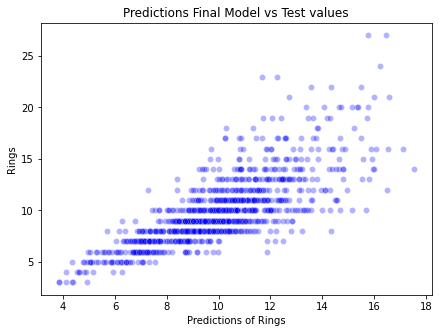

In [36]:
#plot
fig, ax = plt.subplots(1,1, figsize=(7, 5))
sns.scatterplot(y_pred, y_test, alpha=0.3, color = 'blue')
ax.title.set_text('Predictions Final Model vs Test values')
plt.xlabel('Predictions of Rings')

We can observe on the plot that the higher the number of rings to predict, higher the error.

### Importance of Features

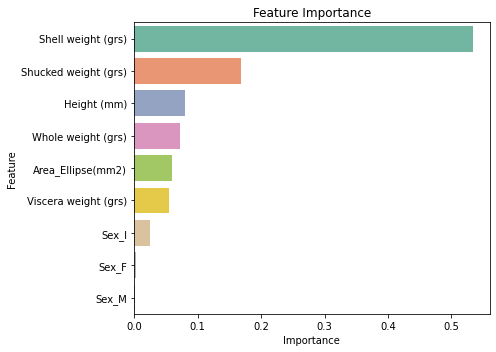

In [38]:
features = {'Feature': X_test.columns,\
 'Importance': model.feature_importances_}

feature_importance = pd.DataFrame(features)
feature_importance = feature_importance.sort_values('Importance', ascending=False)

#plot
fig, ax = plt.subplots(1,1, figsize=(7, 5))
sns.barplot(x = 'Importance', y = 'Feature', palette='Set2', data = feature_importance)
ax.title.set_text('Feature Importance')
plt.tight_layout()


We can observe that the most important feature to predict the number of rings is the shell weight. Also, the Sex of the abalone is the least influential predictor.